In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [3]:
df_train = pd.read_csv('train_LZdllcl.csv')

In [4]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [7]:
df_train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

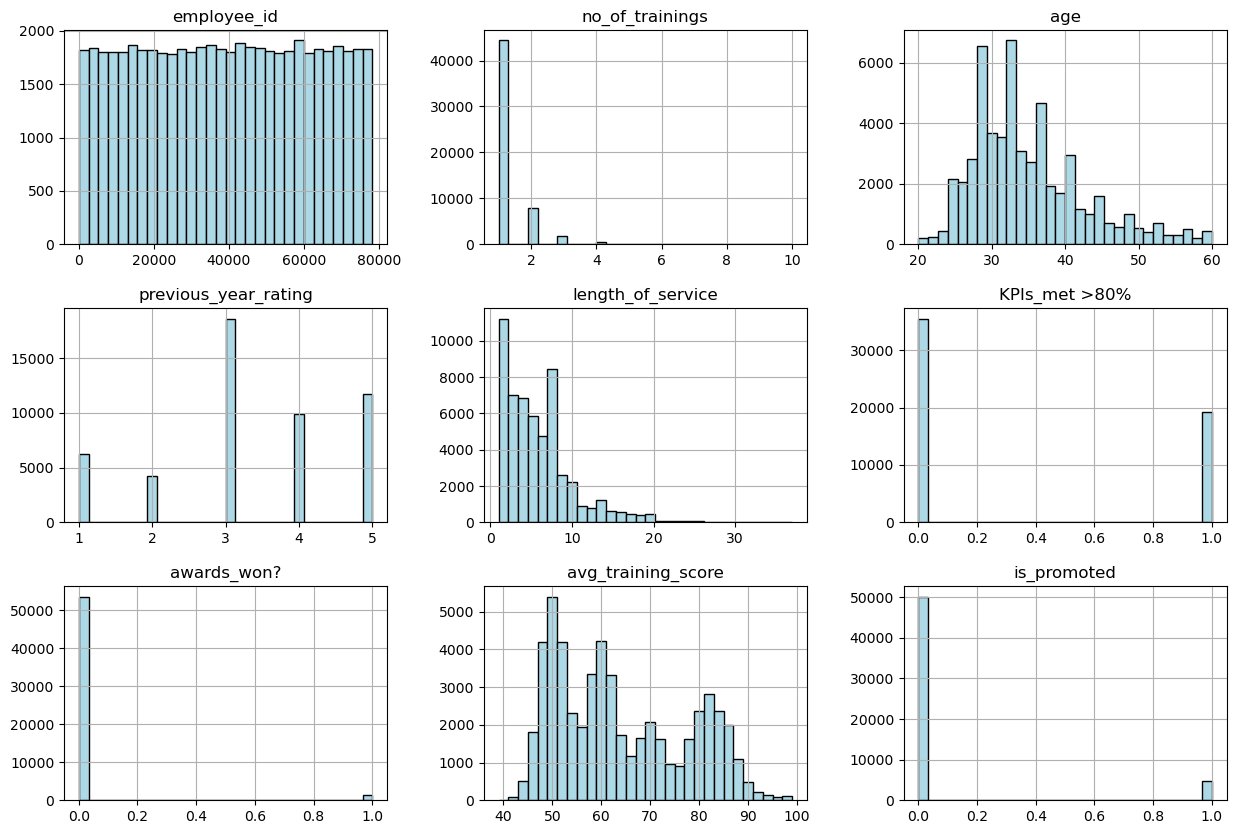

In [8]:
df_train.hist(figsize=(15,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

In [9]:
df_train['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [10]:
df_train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [11]:
df_train['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [12]:
df_train['education'].fillna(df_train['education'].mode()[0], inplace=True)

In [13]:
df_train['previous_year_rating'].value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [14]:
df_train['previous_year_rating'].fillna(2.0, inplace=True)

Encoding

In [15]:
cat_columns = [col for col in df_train.columns if df_train[col].dtype=='O']
cat_columns

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [16]:
label_encoder = LabelEncoder()

for col in cat_columns:
    df_train[col] = label_encoder.fit_transform(df_train[col])

In [17]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [18]:
df_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [19]:
features = ['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']

In [20]:
# Total Training Score

df_train['total_training_score'] = df_train['no_of_trainings'] * df_train['avg_training_score']

In [21]:
# Rating Times Length of Service

df_train['rating_times_length_of_service'] = df_train['previous_year_rating'] * df_train['length_of_service']

In [22]:
# Training Service Ratio

df_train['training_service_ratio'] = df_train['avg_training_score'] / df_train['length_of_service']

In [23]:
X = df_train[features + ['total_training_score', 'rating_times_length_of_service', 'training_service_ratio']]
target = 'is_promoted'
y = df_train[target]

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [26]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [27]:
models = [
    ("XGBoost", XGBClassifier(random_state=42),
     {
         "learning_rate": [0.1, 0.05, 0.01],
         "n_estimators": [100, 200, 300],
         "max_depth": [5, 8, 12],
         "gamma": [0, 0.1, 0.5],
         "colsample_bytree": [0.8, 1.0],
         "subsample": [0.8, 1.0],
     })
]
#Other models ignored due to running time

In [28]:
best_model = None
best_f1_score = 0.0

for model_name, model, params in models:
    grid_search = GridSearchCV(model, params, cv=kfold, scoring="f1", n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Predictions on the validation set
    y_pred_val = grid_search.best_estimator_.predict(X_val_scaled)
    
    # F1 score on the validation set
    f1_val = f1_score(y_val, y_pred_val)
    print(f"F1 Score on Validation Set ({model_name}): {f1_val}")
    
    # Save the best model based on F1 score
    if f1_val > best_f1_score:
        best_f1_score = f1_val
        best_model = grid_search.best_estimator_

F1 Score on Validation Set (XGBoost): 0.5178849144634525


In [29]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [30]:
df_test = pd.read_csv('test_2umaH9m.csv')

In [31]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [33]:
df_test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [34]:
df_test['education'].fillna(df_test['education'].mode()[0], inplace=True)

In [35]:
df_test['previous_year_rating'].fillna(2.0, inplace=True)

In [36]:
label_encoder = LabelEncoder()
for col in cat_columns:
    df_test[col] = label_encoder.fit_transform(df_test[col])

In [37]:
df_test['total_training_score'] = df_test['no_of_trainings'] * df_test['avg_training_score']
df_test['rating_times_length_of_service'] = df_test['previous_year_rating'] * df_test['length_of_service']
df_test['training_service_ratio'] = df_test['avg_training_score'] / df_test['length_of_service']

In [38]:
X_test = df_test[features + ['total_training_score', 'rating_times_length_of_service', 'training_service_ratio']]

In [39]:
X_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,total_training_score,rating_times_length_of_service,training_service_ratio
0,8,18,0,1,2,1,24,2.0,1,1,0,77,77,2.0,77.000000
1,2,28,0,0,0,1,31,3.0,5,0,0,51,51,15.0,10.200000
2,7,4,0,1,0,1,31,1.0,4,0,0,47,47,4.0,11.750000
3,5,11,0,0,0,3,31,2.0,9,0,0,65,195,18.0,7.222222
4,1,21,0,1,2,1,30,4.0,7,0,0,61,61,28.0,8.714286


In [40]:
X_test_scaled = scaler.transform(X_test)

In [41]:
test_predictions = best_model.predict(X_test_scaled)

In [42]:
submission_df = pd.DataFrame({'employee_id': df_test['employee_id'], 'is_promoted': test_predictions})
submission_df.reset_index(drop=True, inplace=True)
submission_df.to_csv('submission_final.csv', index=False)